In [2]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Z-Score

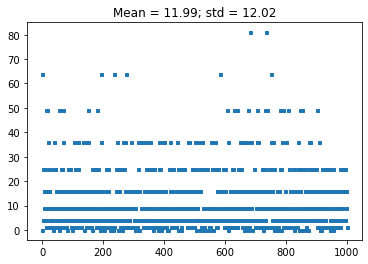

In [4]:
#Generate data
data = np.random.poisson(3, 1000) ** 2

mean = np.mean(data)
std = np.std(data, ddof = 1)

plt.plot(data,'s', markersize = 3)
plt.title(f'Mean = {np.round(mean, 2)}; std = {np.round(std, 2)}');

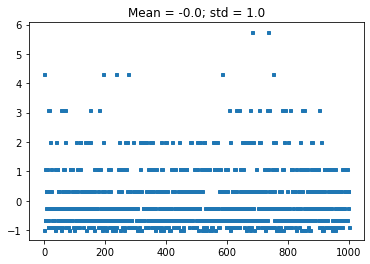

In [6]:
#Z-score
z = (data - mean) / std

#Or using built in function
z_function = stats.zscore(data, ddof = 1)

# compute the mean and std
z_mean = np.mean(z)
z_std = np.std(z, ddof = 1)

plt.plot(z, 's', markersize = 3)
plt.title(f'Mean = {np.round(z_mean, 2)}; std = {np.round(z_std, 2)}');

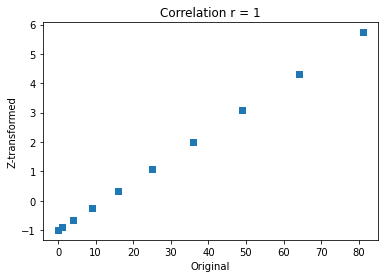

In [8]:
#Show data still distributed the same
plt.plot(data, z, 's')
plt.xlabel('Original')
plt.ylabel('Z-transformed')
plt.title('Correlation r = %g'%np.corrcoef(data, z)[0,0])

# Scaling

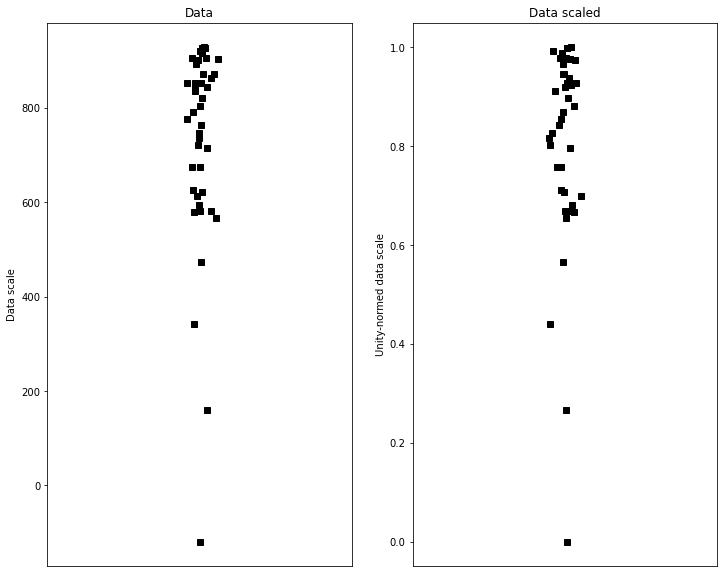

In [10]:
n = 42
data = np.log(np.random.rand(n)) * 234 + 934

min_point = min(data)
max_point = max(data)
scaled = (data - min_point) / (max_point - min_point)

fig,ax = plt.subplots(1, 2, figsize=(12,10))
ax[0].plot(1 + np.random.randn(n) / 20, data, 'ks')
ax[0].set_xlim([0,2])
ax[0].set_xticks([])
ax[0].set_ylabel('Data scale')
ax[0].set_title('Data')

ax[1].plot(1 + np.random.randn(n) / 20, scaled, 'ks')
ax[1].set_xlim([0,2])
ax[1].set_xticks([])
ax[1].set_ylabel('Unity-normed data scale')
ax[1].set_title('Data scaled');

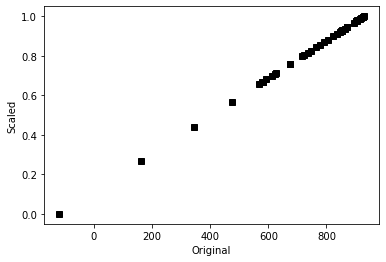

In [11]:
#See data distributed the same
plt.plot(data, scaled, 'ks')
plt.xlabel('Original')
plt.ylabel('Scaled')

In [15]:
#Can now make data have any arbitrary scale
min_new = 3
max_new = 12.87

super_scaled = scaled * (max_new - min_new) + min_new

# test it!
print([min(super_scaled), max(super_scaled)])

[3.0, 12.87]
